# Dancer's business - 3. Market trend
In this notebook session, I will check the trends of nationwide business data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/dance2.csv')

In [3]:
# We don't need the rest for now
df = df[(df.area=='All')&(df.occ=='all_jobs')&(df.year>=1998)]

# Trend of the fitness revenue $R_{Gym}^{U.S.}$

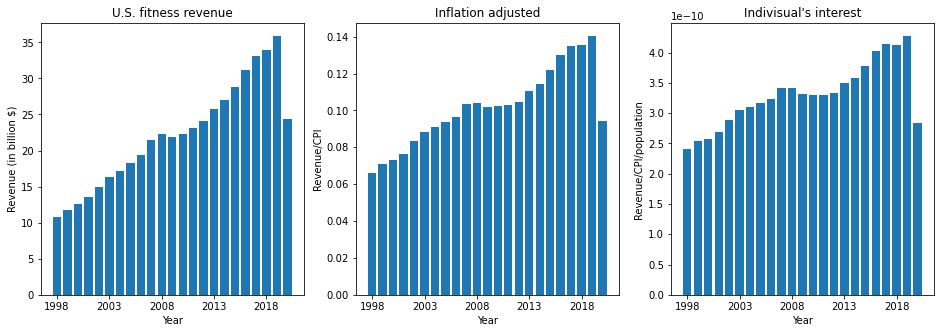

In [4]:
plt.rcParams["figure.figsize"] = [16, 5]
fig, ax_arr = plt.subplots(1,3)

# Revenue plot
ax = ax_arr[0]

x = df.year
y = df.fitness

ax.bar(x, y)
ax.set_title('U.S. fitness revenue')
ax.set_xlabel('Year')
ax.set_ylabel('Revenue (in billion $)')
_ = ax.set_xticks(np.arange(1998,2023, 5))

# Revenue/CPI plot
ax = ax_arr[1]

x = df.year
y = df.fitness/df.cpi

ax.bar(x, y)
ax.set_title('Inflation adjusted')
ax.set_xlabel('Year')
ax.set_ylabel('Revenue/CPI')
_ = ax.set_xticks(np.arange(1998,2023, 5))

# Revenue/CPI/population plot
ax = ax_arr[2]

x = df.year
y = df.fitness/df.cpi/df.population

ax.bar(x, y)
ax.set_title('Indivisual\'s interest')
ax.set_xlabel('Year')
ax.set_ylabel('Revenue/CPI/population')
_ = ax.set_xticks(np.arange(1998,2023, 5))

The data describes the yearly revenue of "Fitness and Recreational Sports Centers" of the U.S.
- From the left plot, fitness revenue has been growing (except between 2008-2009 and 2019-2020).
- From the middle plot, even considering inflation (divided by CPI), the trend stays.
- From the right plot, individual's spending on fitness seems to kept growing, too.

# Trend of the dance studio revenue $R_{Studio}^{U.S.}$

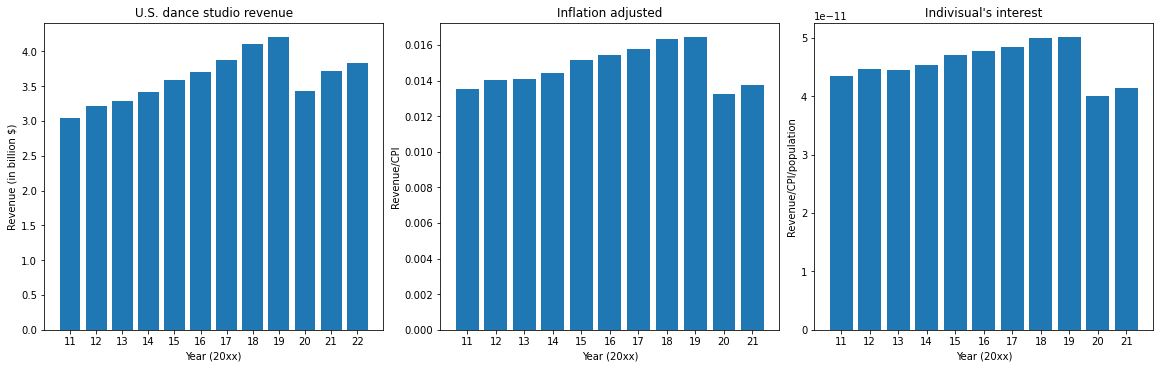

In [5]:
plt.rcParams["figure.figsize"] = [16, 5]
fig, ax_arr = plt.subplots(1,3,constrained_layout=True)

# Revenue plot
ax = ax_arr[0]

x = df.year-2000
y = df.dance_studio

ax.bar(x, y)
ax.set_title('U.S. dance studio revenue')
ax.set_xlabel('Year (20xx)')
ax.set_ylabel('Revenue (in billion $)')
_ = ax.set_xticks(np.arange(11,23, 1.0))

# Revenue/CPI plot
ax = ax_arr[1]

x = df.year-2000
y = df.dance_studio/df.cpi

ax.bar(x, y)
ax.set_title('Inflation adjusted')
ax.set_xlabel('Year (20xx)')
ax.set_ylabel('Revenue/CPI')
_ = ax.set_xticks(np.arange(11,22, 1.0))

# Revenue/CPI/population plot
ax = ax_arr[2]

x = df.year-2000
y = df.dance_studio/df.cpi/df.population

ax.bar(x, y)
ax.set_title('Indivisual\'s interest')
ax.set_xlabel('Year (20xx)')
ax.set_ylabel('Revenue/CPI/population')
_ = ax.set_xticks(np.arange(11,22, 1.0))

Note: revenue plot is up to 2022, where plot with CPI and population adjustment is up to 2021.
- Monotonically increasing trends are similar to the fitness revenue.
- From the left plot, dance studio revenue has been growing (except in 2020, due to COVID19).
- From the middle plot, even considering inflation (divided by CPI), the revenue is growing.
- From the right plot, individual's spending on dance studio seems to kept growing.

# More trends of dance studio businesses
## Number of studio, employee, and employment volume

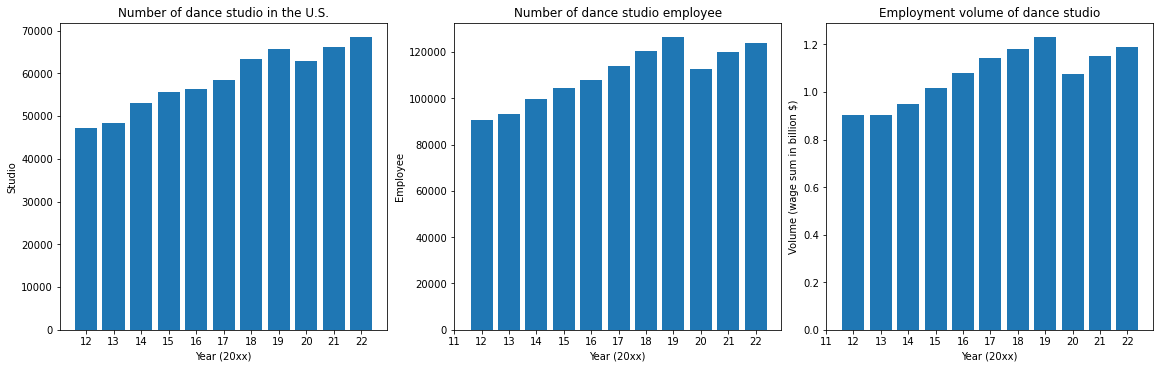

In [6]:
plt.rcParams["figure.figsize"] = [16, 5]
fig, ax_arr = plt.subplots(1,3,constrained_layout=True)

# Number of dance studio plot
ax = ax_arr[0]

x = df.year-2000
y = df.studio_num

ax.bar(x, y)
ax.set_title('Number of dance studio in the U.S.')
ax.set_xlabel('Year (20xx)')
ax.set_ylabel('Studio')
_ = ax.set_xticks(np.arange(12,23, 1.0))

# Number of studio employee
ax = ax_arr[1]

x = df.year-2000
y = df.studio_emp

ax.bar(x, y)
ax.set_title('Number of dance studio employee')
ax.set_xlabel('Year (20xx)')
ax.set_ylabel('Employee')
_ = ax.set_xticks(np.arange(11,23, 1.0))

# Total annual wage of studio employee 
ax = ax_arr[2]

x = df.year-2000
y = df.studio_wage

ax.bar(x, y)
ax.set_title('Employment volume of dance studio')
ax.set_xlabel('Year (20xx)')
ax.set_ylabel('Volume (wage sum in billion $)')
_ = ax.set_xticks(np.arange(11,23, 1.0))


 The total number of studio, employee, and employment volumes are kept growing, dropped at 2020, but then growing again.

## Calculate per studio statistics
Here, I'll assume that 
- the owner of a studio is one person,
- both owners and employees are dancers,
- owner's income = studio revenue - employee wage.

In [7]:
# Calculate per studio values

df['per_studio_a_mean'] = np.nan     
df['per_studio_owner_a_mean'] = np.nan 
df['per_studio_emp_a_mean']  = np.nan 
df['per_studio_emp']  = np.nan 

billion_to_dollar = 1000000000

# revenue of a studio
df.per_studio_a_mean = df.dance_studio/df.studio_num *billion_to_dollar 

# employee wage average
df.per_studio_emp_a_mean = df.studio_wage/df.studio_emp *billion_to_dollar 

# average number of employee per studio
df.per_studio_emp = df.studio_emp/df.studio_num

# income of an owner
df.per_studio_owner_a_mean = df.per_studio_a_mean -\
                             df.per_studio_emp_a_mean*df.per_studio_emp

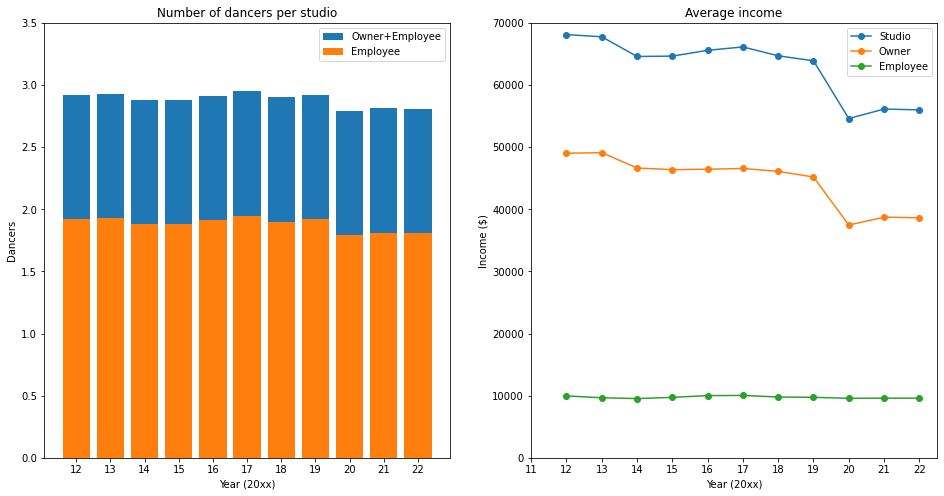

In [8]:
plt.rcParams["figure.figsize"] = [16, 8]
fig, ax_arr = plt.subplots(1,2)#,constrained_layout=True)

# plot Number of dancers per studio
ax = ax_arr[0]

x = df.year-2000

y = df.per_studio_emp+1
ax.bar(x, y, label='Owner+Employee')

y = df.per_studio_emp
ax.bar(x, y, label='Employee')

ax.set_title('Number of dancers per studio')
ax.set_xlabel('Year (20xx)')
ax.set_ylabel('Dancers')
ax.legend()
ax.set_ylim(0,3.5)
_ = ax.set_xticks(np.arange(12,23, 1.0))

# plot Average income per studio
ax = ax_arr[1]

x = df.year-2000

y = df.per_studio_a_mean
ax.plot(x, y, marker='o', label='Studio')

y = df.per_studio_owner_a_mean
ax.plot(x, y, marker='o', label='Owner')

y = df.per_studio_emp_a_mean
ax.plot(x, y, marker='o', label='Employee')

ax.set_title('Average income')
ax.set_xlabel('Year (20xx)')
ax.set_ylabel('Income ($)')
ax.set_ylim(0,70000)
ax.legend()

_ = ax.set_xticks(np.arange(11,23, 1.0))

- In average 2-3 dancers per studio matches with my experiences.
- The annual income of an owner sounds reasonable. One of the best belly dance teacher I know takes about \\$90 for a 6 weeks class. Then annual income estimation can be (50 weeks / 6 weeks)\* \\$90 \* 30 students \* 2 courses = \\$45,000 approximately. 
- The average wage of a dance studio employee is about \\$10000. Assuming their hourly wage is \\$20-40, their working hours per week becomes \\$10000/($20-40)/50 weeks = 5-10 hours. This value sounds typical.
- While the total revenue and the number of studio are increasing over years, the individual's incomes are decreasing. It might tell the competition is getting harder.
- While the number of studio are increasing over years, the number of dancers per studio are decreasing. It might tell more and more dancers are becoming independent studio owners.

# Update dataset

In [10]:
# Read again
df_read = pd.read_csv('data/dance2.csv')

# Merge
df_read = df_read.merge(df[['year',
                            'per_studio_a_mean',
                            'per_studio_owner_a_mean',
                            'per_studio_emp_a_mean',
                            'per_studio_emp']],
                        how='left', on=['year'])

# Update dataset
df_read.to_csv('data/dance3.csv',index=False)